## YOLOV2

In [1]:
!python setup.py build_ext --inplace

running build_ext
copying build\lib.win-amd64-3.6\darkflow\cython_utils\nms.cp36-win_amd64.pyd -> darkflow\cython_utils
copying build\lib.win-amd64-3.6\darkflow\cython_utils\cy_yolo2_findboxes.cp36-win_amd64.pyd -> darkflow\cython_utils
copying build\lib.win-amd64-3.6\darkflow\cython_utils\cy_yolo_findboxes.cp36-win_amd64.pyd -> darkflow\cython_utils


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
import cv2

from darkflow.net.build import TFNet
import cv2

In [2]:
options = {"model": "cfg/yolov2-tiny2C.cfg", 
           "load": "weights/yolov2-tiny.weights",
           "batch": 30,
           "epoch": 400,
           "gpu": 0.7,
           "train": True,
           "annotation": "./train/annotations/",
           "dataset": "./train/images/"}

tfnet = TFNet(options)

Parsing ./cfg/yolov2-tiny.cfg
Parsing cfg/yolov2-tiny2C.cfg
Loading weights/yolov2-tiny.weights ...
Successfully identified 44948600 bytes
Finished in 0.0050013065338134766s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 320, 320, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 320, 320, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 160, 160, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 160, 160, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 80, 80, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 80, 80, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 40, 40, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 40, 40, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 20, 20, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky

W0918 14:06:21.859373 14440 deprecation.py:323] From C:\Users\HORUS\Notebooks\ObjectDetection\darkflow\darkflow\net\yolov2\train.py:87: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W0918 14:06:21.915386 14440 deprecation.py:323] From C:\Users\HORUS\Miniconda3\envs\tf_env\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Building cfg/yolov2-tiny2C.cfg loss
Building cfg/yolov2-tiny2C.cfg train op


W0918 14:06:22.469511 14440 deprecation.py:506] From C:\Users\HORUS\Miniconda3\envs\tf_env\lib\site-packages\tensorflow\python\training\rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Finished in 4.033377647399902s



## Training the Model

Training took about **an hour** on NVIDIA RTX 2070 SUPER

In [3]:
tfnet.train()


cfg/yolov2-tiny2C.cfg parsing ./train/annotations/
Parsing for ['poro', 'arrastre'] 
[====================>]100%  o.xml
Statistics:
poro: 171
arrastre: 40
Dataset size: 152
Dataset of 152 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 30
	Epoch number  : 400
	Backup every  : 2000
step 1 - loss 64.2623519897461 - moving ave loss 64.2623519897461
step 2 - loss 64.05658721923828 - moving ave loss 64.24177551269531
step 3 - loss 63.794189453125 - moving ave loss 64.19701690673828
step 4 - loss 63.246036529541016 - moving ave loss 64.10191886901856
step 5 - loss 63.104427337646484 - moving ave loss 64.00216971588135
Finish 1 epoch(es)
step 6 - loss 62.901241302490234 - moving ave loss 63.89207687454224
step 7 - loss 62.507057189941406 - moving ave loss 63.75357490608216
step 8 - loss 62.526790618896484 - moving ave loss 63.63089647736359
step 9 - loss 62.09391403198242 - moving ave loss 63.47719823282547
step 10 - loss 62.0836181640625 - moving ave loss 63.337840

W0918 14:52:38.609278 14440 deprecation.py:323] From C:\Users\HORUS\Miniconda3\envs\tf_env\lib\site-packages\tensorflow\python\training\saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


step 1387 - loss 1.6940900087356567 - moving ave loss 1.3535095487471054
step 1388 - loss 1.2098677158355713 - moving ave loss 1.339145365455952
step 1389 - loss 1.2763047218322754 - moving ave loss 1.3328613010935844
step 1390 - loss 0.9096997380256653 - moving ave loss 1.2905451447867924
Finish 278 epoch(es)
step 1391 - loss 1.3995387554168701 - moving ave loss 1.3014445058498
step 1392 - loss 1.0277193784713745 - moving ave loss 1.2740719931119575
step 1393 - loss 1.0294820070266724 - moving ave loss 1.2496129945034289
step 1394 - loss 1.189831018447876 - moving ave loss 1.2436347968978736
step 1395 - loss 1.603234887123108 - moving ave loss 1.2795948059203972
Finish 279 epoch(es)
step 1396 - loss 1.7592639923095703 - moving ave loss 1.3275617245593145
step 1397 - loss 1.0329424142837524 - moving ave loss 1.2980997935317584
step 1398 - loss 1.0227402448654175 - moving ave loss 1.2705638386651243
step 1399 - loss 1.1888319253921509 - moving ave loss 1.262390647337827
step 1400 - loss

## TO LOAD THE GRAPH

In [4]:
# this line of code lets you save the built graph to a protobuf file (.pb)
# this step is unnecessary for this notebook
# Esta funcion sirve para crear archivo .pb y .meta los cuales sirve para ya no usar .cfg y .weights
tfnet.savepb()

## Loading from the Latest Checkpoint

This cell shows how to load custom trained model from the checkpoint. It will easy your work.

__1. model__: the model configuration that you used (\*.cfg)

__2. load__: set -1. In this way, the latest checkpoint will be loaded.

In [5]:
options = {"model": "cfg/yolov2-tiny2C.cfg",
           "load": -1,
           #"load": 12000,
           "gpu": 0.7}
tfnet2 = TFNet(options)

Parsing cfg/yolov2-tiny2C.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 320, 320, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 320, 320, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 160, 160, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 160, 160, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 80, 80, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 80, 80, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 40, 40, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 40, 40, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 20, 20, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 20, 20, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 10, 10, 256)
 Init  |  Yep! 

W0918 15:14:15.889475 14440 deprecation.py:323] From C:\Users\HORUS\Miniconda3\envs\tf_env\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Loading from ./ckpt/yolov2-tiny2C-2000
Finished in 2.1834826469421387s



## load_from_ckpt()

By calling load_from_ckpt() method in TFNet, it will load pre-trained parameters from the checkpoint that you just specified in options.

In [6]:
tfnet2.load_from_ckpt()

Loading from ./ckpt/yolov2-tiny2C-2000


## Predicting on a Image

This part is almost identical to my previous notebook [Object-Detection-YOLOv2-Darkflow](https://github.com/deep-diver/Object-Detection-YOLOv2-Darkflow). If you wonder some process, please check it out. I have also written some more information about the basic in [medium](https://towardsdatascience.com/yolov2-object-detection-using-darkflow-83db6aa5cf5f), so please check it out.

[]


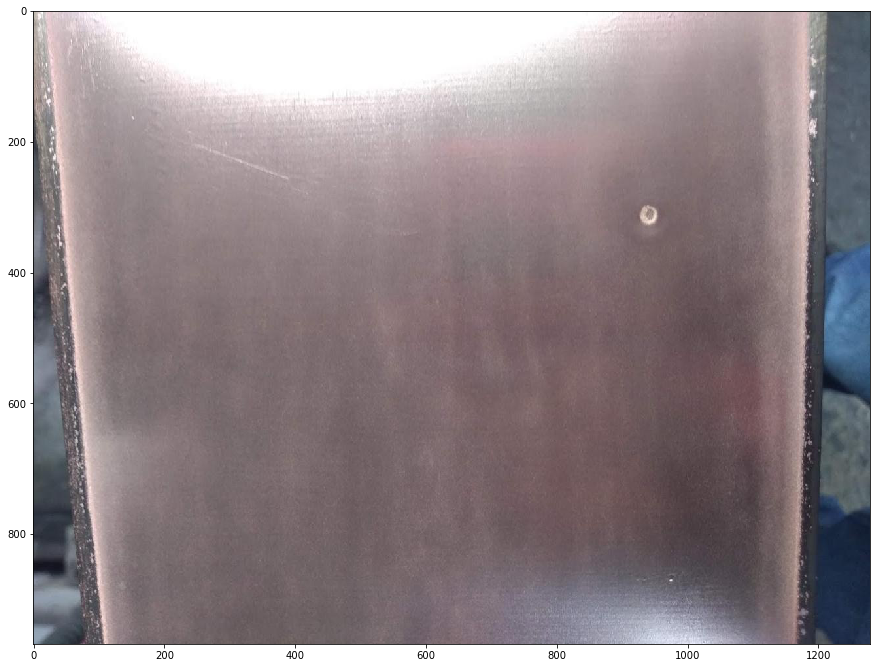

In [7]:
import pprint as pp

original_img = cv2.imread("sample_img/poros/223.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
fig, ax = plt.subplots(figsize=(15, 15))
print(results)
ax.imshow(original_img)

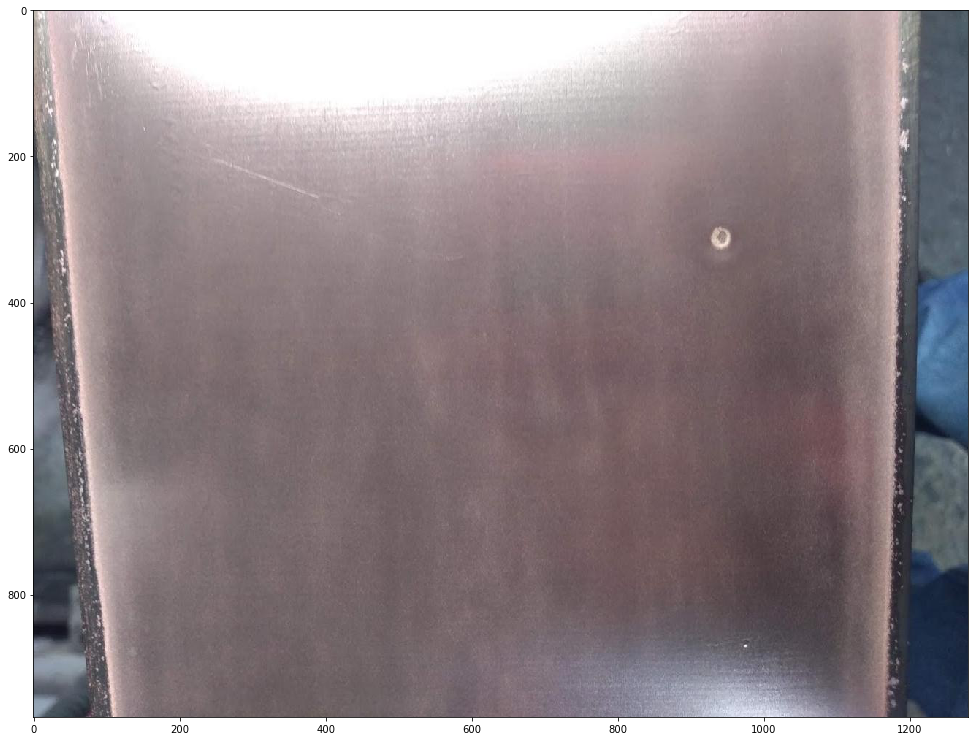

In [8]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 2.0, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

fig, ax = plt.subplots(figsize=(20, 13))
ax.imshow(boxing(original_img, results))

In [14]:
from math import ceil

#fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

#for i in range(5):
   # original_img = cv2.imread("sample_img/test_image" + str(i+1) + ".jpg")
    #original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    #results = tfnet2.return_predict(original_img)
    
   # ax[ceil(i/3)-1, i%3].imshow(boxing(original_img, results))

## Predicting on a Video

In [11]:
cap = cv2.VideoCapture('./sample_video/Video3.mp4')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 

fourcc = cv2.VideoWriter_fourcc(*'DIVX') 
#fourcc = cv2.VideoWriter_fourcc(*'MP4V') 
out = cv2.VideoWriter('./sample_video/output1.avi',fourcc, 20.0, (int(width), int(height)))
#out = cv2.VideoWriter('./sample_video/output1.mp4',fourcc, 20.0, (int(width), int(height)))

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)      
        results = tfnet2.return_predict(frame)
        #if results:
          #  print(results)
        
        new_frame = boxing(frame, results)

        # Display the resulting frame
        out.write(new_frame)
        cv2.imshow('frame', new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()

In [1]:
#from IPython.display import YouTubeVideo
#YouTubeVideo('1MwIVcni0P4')